In [345]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [346]:
import pandas as pd

In [347]:
class NumericalMethod():
    def __init__(self,updates = None):
        self.updates = updates
        
    def add_step(self,update):
        if self.updates is None:
            self.updates = update
        else:
            self.updates = np.vstack((self.updates,update))
        
    @property
    def update_count(self):
        return self.updates.shape[0]-1
    
    def __call__(self,function,tn,yn,h):
        if self.updates.shape[0] != self.updates.shape[1]:
            raise Exception('Update matrix not square')
        k = np.zeros(shape=(self.update_count,))
        for i in range(self.update_count):
            a = self.updates[i,0]
            b = self.updates[i,1:]
            k[i] = h*function(tn+a*h,yn+b.dot(k.T))
        b = self.updates[self.update_count,1:]
        return b.dot(k.T)

In [348]:
def draw_graphs(method, start_x, start_y, dy, y = None, step = 0.1):
    count = np.ceil(10.0/step)
    X = np.linspace(start_x,start_x+10,count)
    Y = np.zeros_like(X)
    local_errors = np.zeros_like(X)
    Y[0] = start_y
    if y:
        real_y = y(X)
    for i in np.arange(1,count):
        Y[i] = Y[i-1] + method(function=dy,tn=X[i-1],yn=Y[i-1],h=step)
        if y:
            local_errors[i] = np.abs(real_y[i]-real_y[i-1] - method(function=dy,tn=X[i-1],yn=real_y[i-1],h=step))
    if y:
        global_errors = np.abs(Y-real_y)

    plt.figure(figsize = (9,9))
    plt.subplot(3,1,1)
    plt.plot(X,Y, color = 'blue', label ='approximation')
    plt.legend(loc = 'upper left')
    if y:
        plt.plot(X,real_y,color = 'red', label='function value',linestyle='--')
        plt.legend(loc = 'upper left')    
        plt.subplot(3,1,2)
        plt.plot(X,global_errors,label ='global error')
        plt.legend(loc = 'upper left')
        plt.subplot(3,1,3)
        plt.plot(X,local_errors,label='local_error')
        plt.legend(loc = 'upper left')
    plt.show()

In [349]:
def get_error(method,start_x,start_y,dy,y,steps):
    errors = np.zeros_like(np.asarray(steps))
    for k,step in enumerate(steps):
        errors[k] = np.abs(start_y-y(start_x+step) - method(function=dy,tn=start_x,yn=start_y,h=step))
    return steps,errors

In [350]:
# feed this to test methods: a tuple with:  start_x, start_y, dy, y,
ode_1 = (0,
         1,
         lambda t:np.exp(t),
         lambda t,y:np.exp(t))

ode_2 = (0,
         2,
         lambda t,y:np.cos(t)**2 - y*np.tan(t),
         lambda t:(np.sin(t) + 2) * np. cos(t))

ode_3 = (0,
        1,
        lambda t,y:y*np.cos(t),
        lambda t: np.exp(sin(t)))

ode_4 = (0,
        1,
        lambda t,y:-10.*y,
        lambda t: np.exp(-10.*t))

In [351]:
def test_error(method, ode = ode_2):
    steps, errors = get_error(method,
                     start_x=ode[0],
                     start_y=ode[1],
                     dy = ode[2],
                     y = ode[3],
                     steps = [1.,0.1,0.01,0.001])
    df = pd.DataFrame()
    df['step'] = pd.Series(steps)
    df['avg_errors'] = pd.Series(errors)
    return df

In [352]:
def test_method(method, ode = ode_2):
    draw_graphs(method,
                start_x=ode[0],
                start_y=ode[1],
                dy = ode[2],
                y = ode[3],
                step = 0.1)

In [353]:
runge_kutty = NumericalMethod(np.array([[0.,0.,0.],[0.5,0.5,0.],[0.,0.,1.]]))

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


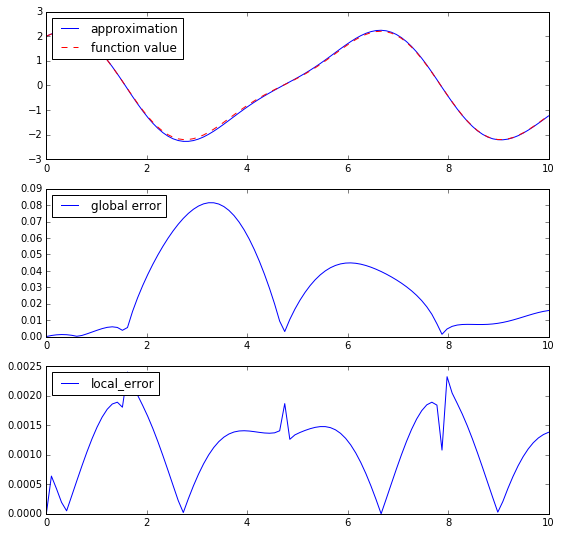

In [354]:
test_method(runge_kutty)

In [355]:
test_error(runge_kutty)

,step,avg_errors
0,1.000,1.060352
1,0.100,0.178835
2,0.010,0.019799
3,0.001,0.001998


In [356]:
euler = NumericalMethod(np.array([[1,0],[0,1]]))

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


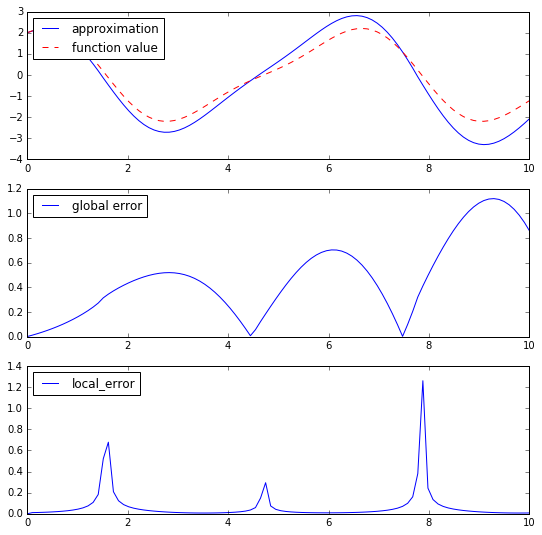

In [357]:
test_method(euler)

In [358]:
test_error(euler)

,step,avg_errors
0,1.000,3.287636
1,0.100,0.168279
2,0.010,0.019698
3,0.001,0.001997


In [359]:
euler_reverse = NumericalMethod(
    np.array([[0.,0.,0.],
              [1.,1.,0.],
              [0.,0.,1.]]))

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


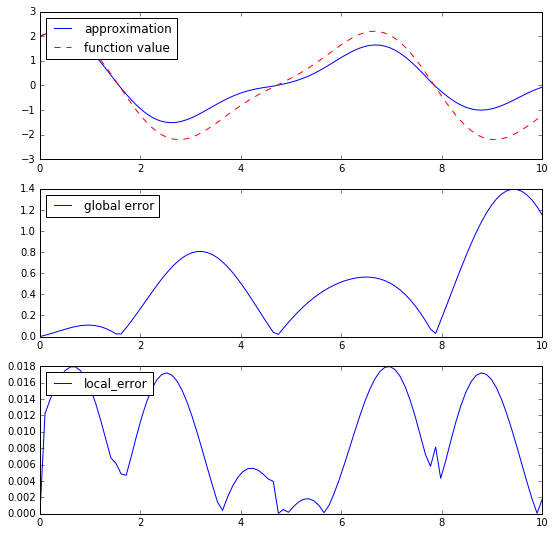

In [360]:
test_method(euler_reverse)

In [361]:
test_error(euler_reverse)

,step,avg_errors
0,1.000,4.845043
1,0.100,0.167276
2,0.010,0.019697
3,0.001,0.001997


In [362]:
heuns = NumericalMethod(
    np.array([[0.,0.,0.],
              [1.,1.,0.],
              [0.,.5,.5]]))

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


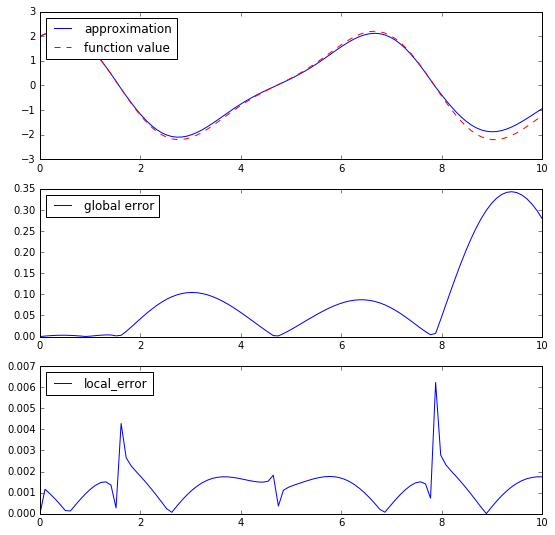

In [363]:
test_method(heuns)

In [364]:
test_error(heuns)

,step,avg_errors
0,1.000,2.154895
1,0.100,0.178310
2,0.010,0.019798
3,0.001,0.001998


In [365]:
middle_point = NumericalMethod(
    np.array([[0.,0.,0.],
              [.5,.5,0.],
              [0.,0.,1.]]))

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


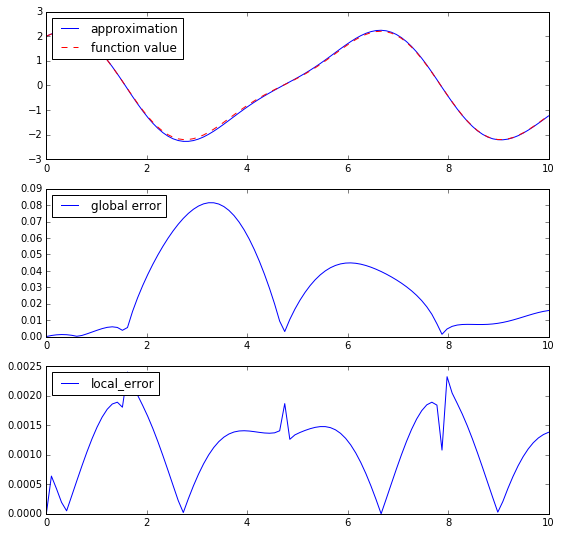

In [366]:
test_method(middle_point)

In [367]:
test_error(middle_point)

,step,avg_errors
0,1.000,1.060352
1,0.100,0.178835
2,0.010,0.019799
3,0.001,0.001998


In [368]:
runge_kutty_3= NumericalMethod(
    np.array([[0.,0.,0.,0.,0.],
              [.5,.5,0.,0.,0.],
              [1.,0.,1.,0.,0.],
              [1.,0.,0.,1.,0.],
              [0.,1./6.,2./3.,0.,1./6.]]))

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


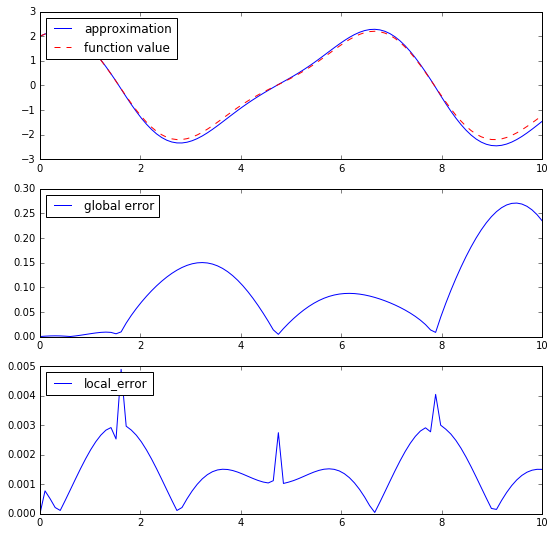

In [369]:
test_method(runge_kutty_3)

In [370]:
test_error(runge_kutty_3)

,step,avg_errors
0,1.000,0.673675
1,0.100,0.178696
2,0.010,0.019799
3,0.001,0.001998


In [371]:
runge_kutty_4 = NumericalMethod(np.array([[0.,0.,0.,0.,0.],
                                         [.5,.5,0.,0.,0.],
                                         [.5,0.,.5,0.,0.],
                                         [1.,0.,0.,1.,0.],
                                         [0.,1./6.,2./6.,2./6.,1./6.]]))

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


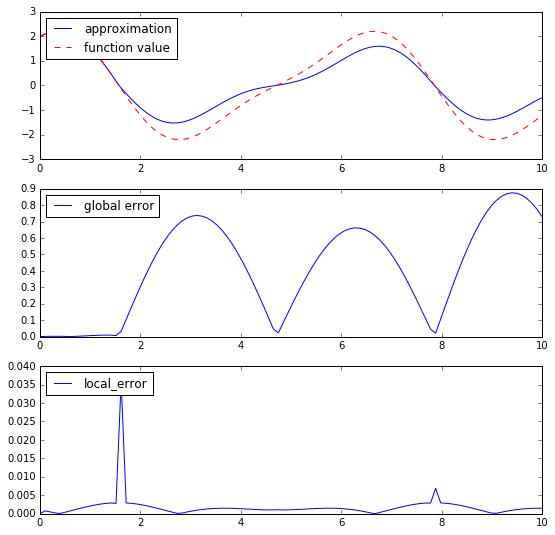

In [372]:
test_method(runge_kutty_4)

In [373]:
test_error(runge_kutty_4)

,step,avg_errors
0,1.000,0.978882
1,0.100,0.178686
2,0.010,0.019799
3,0.001,0.001998


In [374]:
merson = NumericalMethod(
    np.array([[0.,0.,0.,0.,0.,0.],
              [1./3.,1./3.,0.,0.,0.,0.],
              [1./3.,1./6.,1./6.,0.,0.,0.],
              [1./2.,1./8.,0.,3./8.,0.,0.],
              [1.,1./2.,0.,-3./2.,2.,0.],
              [0.,1./6.,0.,0.,2./3.,1./6.]]))

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


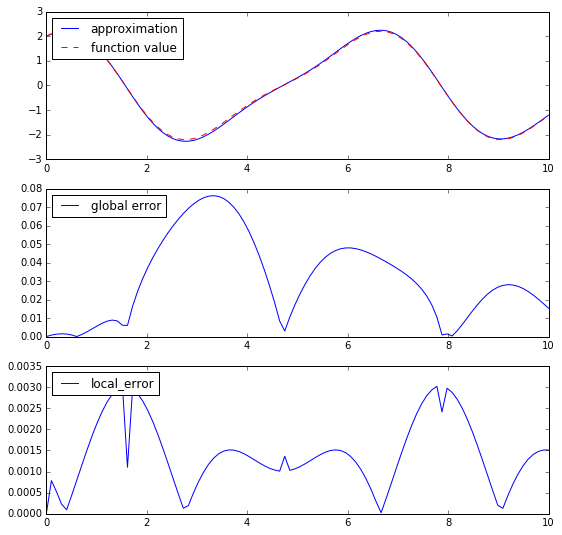

In [375]:
test_method(merson)

In [376]:
test_error(merson)

,step,avg_errors
0,1.000,0.906496
1,0.100,0.178686
2,0.010,0.019799
3,0.001,0.001998


In [377]:
scraton = NumericalMethod(
    np.array([[0.,0.,0.,0.,0.,0.],
              [2./9.,2./9.,0.,0.,0.,0.],
              [1./3.,1./12.,1./4.,0.,0.,0.],
              [3./4.,69./128.,-243./128.,270./128.,0.,0.],
              [.9,-9.*.0345,9.*.2025,-9.*.1224,9.*.0544,0.],
              [0.,17./162.,0.,81./170.,32./135.,250./1377.]]))

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


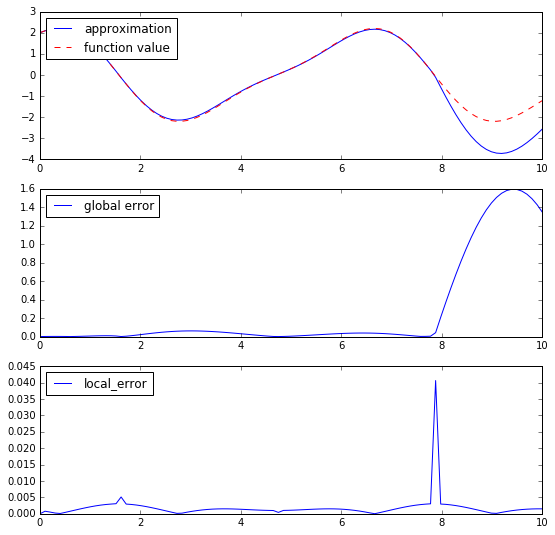

In [378]:
test_method(scraton)

In [379]:
test_error(scraton)

,step,avg_errors
0,1.000,0.928917
1,0.100,0.178686
2,0.010,0.019799
3,0.001,0.001998
